# Final exercise: CO2 Emissions


By: Jelle van den Elsen

Date of submission: 10-05-2024

## Part 1: preparations

In [2]:
# install modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [9]:
# import datasets from ourworldindata
# I randomly picked a few variables that could explain co2 emissions per capita (f.a. income, trade etc.)

co2 = pd.read_csv('https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/co-emissions-per-capita.csv')
income = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/median-income-after-tax-lis.csv")
internet = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/share-of-individuals-using-the-internet.csv")
trade = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/trade-as-share-of-gdp.csv")
industry = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/industry-share-of-total-emplyoment.csv")
gdp_growth = pd.read_csv("https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/annual-gdp-growth.csv")

# Check data
display(income)
display(co2)

# We can see that the income data has way less rows than the co2 data, something to keep in mind when merging the data
# (merged data will have probably have less rows since we merge based on 'inner', considering both Year and Entity)


,Entity,Code,Year,"Median (Disposable household income, equivalized)"
0,Australia,AUS,1981,21880.08
1,Australia,AUS,1985,21807.39
2,Australia,AUS,1989,22009.95
3,Australia,AUS,1995,20206.26
4,Australia,AUS,2001,22712.27
...,...,...,...,...
749,Vietnam,VNM,2005,4776.31
750,Vietnam,VNM,2007,5786.49
751,Vietnam,VNM,2009,6242.77
752,Vietnam,VNM,2011,7335.61


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26595,Zimbabwe,ZWE,2018,0.711830
26596,Zimbabwe,ZWE,2019,0.636645
26597,Zimbabwe,ZWE,2020,0.500945
26598,Zimbabwe,ZWE,2021,0.524972


In [10]:
# merging the data

# nerge 'co2' and 'income' DataFrames based on 'Entity' and 'Year' and 'Code'
merged_data = co2.merge(income, how="inner", on=["Entity", "Year", "Code"])

# now use the merged_data dataframe from above to merge the rest of the data
merged_data = merged_data.merge(internet, how="inner", on=["Entity", "Year", "Code"])
merged_data = merged_data.merge(trade, how="inner", on=["Entity", "Year", "Code"])
merged_data = merged_data.merge(industry, how="inner", on=["Entity", "Year", "Code"])
merged_data = merged_data.merge(gdp_growth, how="inner", on=["Entity", "Year", "Code"])

# # sidenote: could probably make the code above more tidy and efficient using a loop and a list like so:
# dataframes_to_merge = [income, internet, trade, industry, gdp_growth]
# merged_data = co2.copy()  
# for df in dataframes_to_merge:
#     merged_data = merged_data.merge(df, how="inner", on=["Entity", "Year", "Code"])


# check the resulting merged DataFrame
merged_data

# as we can see the merged_data has 569 rows after all the merges, most likley 
# due to the fact that the income data is quite limited (few rows)

,Entity,Code,Year,Annual CO₂ emissions (per capita),"Median (Disposable household income, equivalized)",Individuals using the Internet (% of population),Trade (% of GDP),"Industry as % of total employment -- ILO modelled estimates, May 2017",17.13.1 - Annual GDP growth (%) - NY_GDP_MKTP_KD_ZG
0,Australia,AUS,1995,16.944706,20206.26,2.759654,37.706630,22.800,3.89
1,Australia,AUS,2001,18.587940,22712.27,52.689266,44.250355,20.958,2.04
2,Australia,AUS,2008,19.025700,31256.07,71.670000,42.864070,21.622,3.57
3,Australia,AUS,2010,18.416328,31053.91,76.000000,40.520332,20.948,2.21
4,Australia,AUS,2014,16.747185,33399.60,84.000000,42.471740,22.100,2.58
...,...,...,...,...,...,...,...,...,...
564,Vietnam,VNM,2005,1.152794,4776.31,12.739929,130.714840,18.796,7.55
565,Vietnam,VNM,2007,1.196635,5786.49,20.755445,154.605380,21.140,7.13
566,Vietnam,VNM,2009,1.439514,6242.77,26.550000,134.706310,21.112,5.40
567,Vietnam,VNM,2011,1.726789,7335.61,35.070000,125.260590,21.170,6.41


## Part 2: the exercises

Exercise 1: Biggest predictor of CO2 output

In [11]:
# biggest predictor of CO2 emmissions per capita
# calculate correlation coefficients between CO2 emissions and each predictor variable
correlation_trade = merged_data['Annual CO₂ emissions (per capita)'].corr(merged_data['Trade (% of GDP)'])
correlation_internet = merged_data['Annual CO₂ emissions (per capita)'].corr(merged_data['Individuals using the Internet (% of population)'])
correlation_industry = merged_data['Annual CO₂ emissions (per capita)'].corr(merged_data['Industry as % of total employment -- ILO modelled estimates, May 2017'])
correlation_gdp_growth = merged_data['Annual CO₂ emissions (per capita)'].corr(merged_data['17.13.1 - Annual GDP growth (%) - NY_GDP_MKTP_KD_ZG'])
correlation_income = merged_data['Annual CO₂ emissions (per capita)'].corr(merged_data['Median (Disposable household income, equivalized)'])

# print correlation coefficients
print("Correlation with CO2 emissions:")
print(f"Trade: {correlation_trade}")
print(f"Internet: {correlation_internet}")
print(f"Industry: {correlation_industry}")
print(f"GDP Growth: {correlation_gdp_growth}")
print(f"Income: {correlation_income}")

# income is the biggest predictor with a correlation of approx. 0.71!!!


Correlation with CO2 emissions:
Trade: 0.323718478114301
Internet: 0.1464935819960724
Industry: 0.15649287505238552
GDP Growth: -0.08159100322335555
Income: 0.7139143631846131


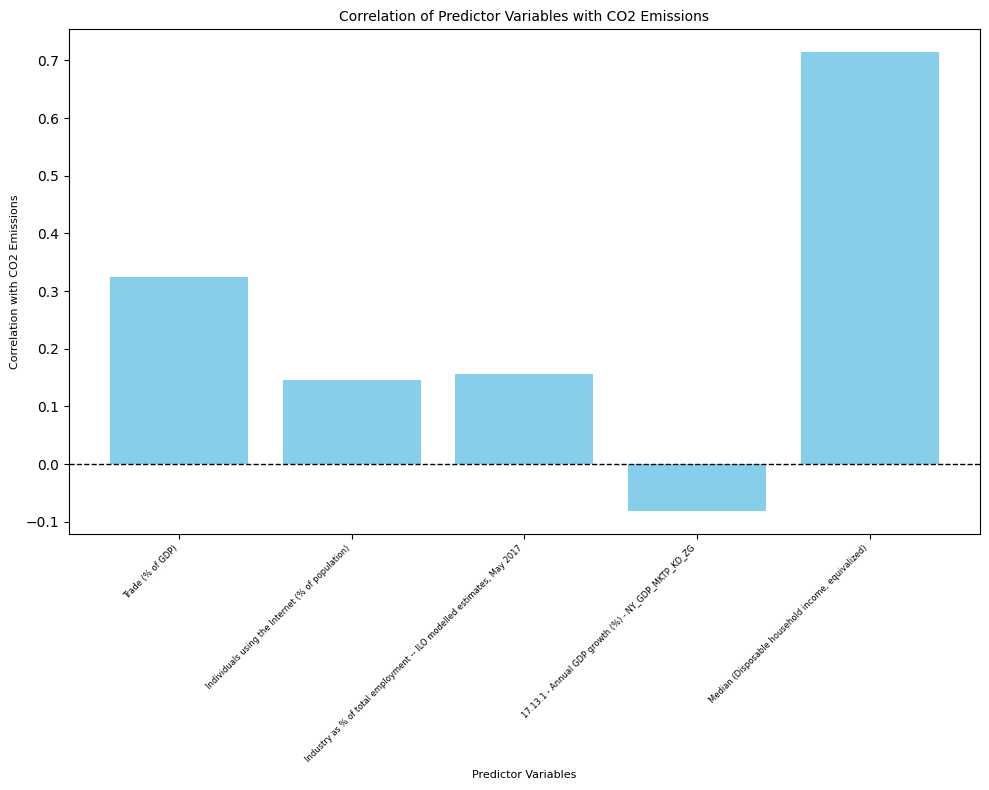

In [12]:
# now to visualise the data using a graph:
# lets plot a bar graph where the correlation coefficients are on the y-axis and the predictor variables are on the x-axis:
# list of predictor variables and their correlations
predictor_variables = ['Trade (% of GDP)',
                       'Individuals using the Internet (% of population)',
                       'Industry as % of total employment -- ILO modelled estimates, May 2017',
                       '17.13.1 - Annual GDP growth (%) - NY_GDP_MKTP_KD_ZG',
                       'Median (Disposable household income, equivalized)']
correlation_values = [correlation_trade, correlation_internet, correlation_industry, correlation_gdp_growth, correlation_income]

# create bar graph
mpl.figure(figsize=(10, 8))
mpl.bar(predictor_variables, correlation_values, color='skyblue')

# add labels and title
mpl.xlabel('Predictor Variables', fontsize = 8)
mpl.ylabel('Correlation with CO2 Emissions', fontsize = 8)
mpl.title('Correlation of Predictor Variables with CO2 Emissions', fontsize = 10)

# rotate x-axis labels for better readability
mpl.xticks(rotation=45, ha='right', fontsize = 6)

# add horizontal line at y=0
mpl.axhline(y=0, color='black', linestyle='--', linewidth=1)

# show plot
mpl.tight_layout()
mpl.show()

In [13]:
# lets also look a a proper regression analysis to see which is the biggest predictor 
# import module for convenient regression analysis
import statsmodels.api as sm

# define the predictor variables and the target variable
predictors = ['Trade (% of GDP)', 
              'Individuals using the Internet (% of population)', 
              'Industry as % of total employment -- ILO modelled estimates, May 2017', 
              '17.13.1 - Annual GDP growth (%) - NY_GDP_MKTP_KD_ZG', 
              'Median (Disposable household income, equivalized)']
target = 'Annual CO₂ emissions (per capita)'

# extract predictor and target variable data from the dataframe
X = merged_data[predictors]
y = merged_data[target]

# add a constant term for the intercept
X_with_const = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# print the regression summary which includes coefficients and p-values
print(results.summary())

# as we can see from the output: all the explanatory variables are significant (p<0.05)
# moreover, the t-value of median disposable household income is exeptionally large 
# and the standard error is very low compared to the other variables
# this is in line with what we saw earlier (corr of 0.71), income is the strongest predictor once again

                                    OLS Regression Results                                   
Dep. Variable:     Annual CO₂ emissions (per capita)   R-squared:                       0.585
Model:                                           OLS   Adj. R-squared:                  0.582
Method:                                Least Squares   F-statistic:                     159.0
Date:                               Fri, 10 May 2024   Prob (F-statistic):          3.54e-105
Time:                                       11:07:54   Log-Likelihood:                -1550.2
No. Observations:                                569   AIC:                             3112.
Df Residuals:                                    563   BIC:                             3139.
Df Model:                                          5                                         
Covariance Type:                           nonrobust                                         
                                                            

Exercise 2: Which countries are making the biggest strides in decreasing CO2 output?


In [15]:
# for this we only need co2 column
# because we have so many countries, lets try to narrow it down to 10 for plotting purposes later
# we will do this by looking at the percentage change in Annual CO₂ emissions per year and taking the average across all years 

# calculate the percentage change in CO2 emissions per capita for each country
co2['Percentage Change'] = co2.groupby('Entity')['Annual CO₂ emissions (per capita)'].pct_change() * 100
co2_no_na = co2.dropna(subset=['Percentage Change'])

# calculate the average percentage change
average_percentage_change = co2_no_na.groupby('Entity')['Percentage Change'].mean()

# see the average percentage change per country, the lower the better, 
# preferably a negative number (means reduction in CO2 across all years)
average_percentage_change

# filter the data to get 10 countries with the lowest average percentage change
lowest_average_percentage_change = average_percentage_change.nsmallest(10)

# display the result
print(lowest_average_percentage_change)

# as we can see Zambia is the only country where they are making the best progress to reduce CO2 emissions across all years 
# ofcourse this does not tell the whole story: there might be fewer data on Zambia, Zambia is a developing country so they might have fewer CO2 emissions to begin with etc. 
# but the purpose of this course is to learn Python, not to provide accurate analysis, so lets keep it like this :)

Entity
Zambia                     -0.609051
Nauru                       0.211591
Micronesia (country)        0.685431
Malawi                      0.771782
United Kingdom              1.105093
Belgium                     1.247655
Turks and Caicos Islands    1.363807
Anguilla                    1.519862
New Zealand                 1.748511
Europe (excl. EU-27)        1.873300
Name: Percentage Change, dtype: float64


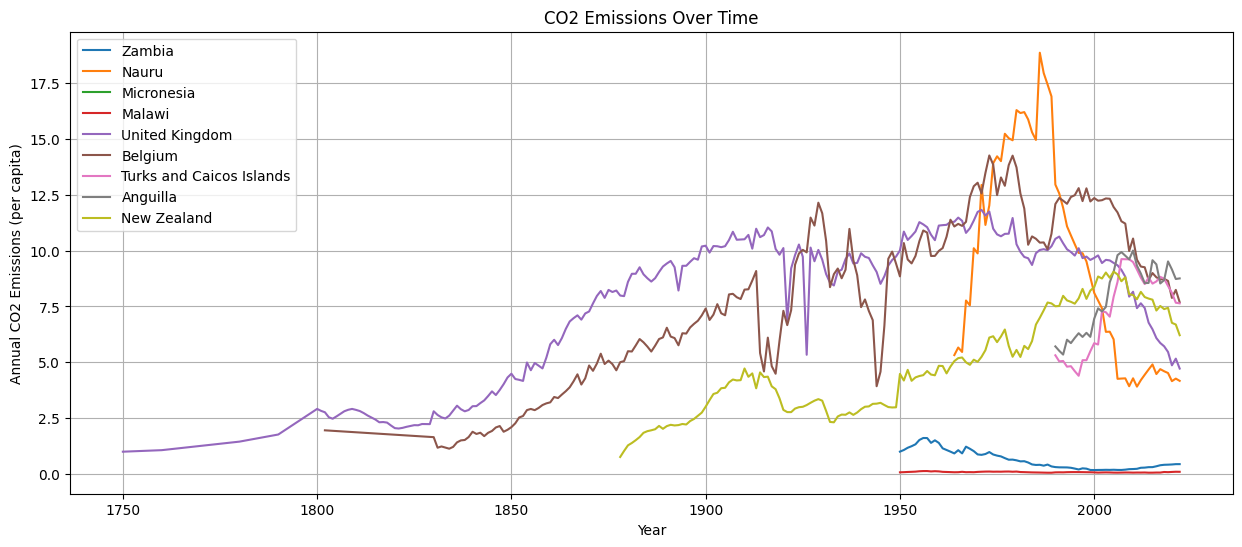

In [16]:
# now lets plot the data on the line graph and change te size
mpl.figure(figsize=(15, 6)) 

# lets select only the top 10 (top 9 in this case since #10 is the whole of Europe) countries to plot, from the last block of code
entities_of_interest = ['Zambia', 'Nauru', 'Micronesia', 'Malawi', 'United Kingdom',
                        'Belgium', 'Turks and Caicos Islands', 'Anguilla', 'New Zealand']

# filter the co2 dataframe to include only the rows where the 'Entity' column matches the entities of interest
filtered_co2 = co2[co2['Entity'].isin(entities_of_interest)]

# create the line plot
for entity in entities_of_interest:
    entity_data = filtered_co2[filtered_co2['Entity'] == entity]
    mpl.plot(entity_data['Year'], entity_data['Annual CO₂ emissions (per capita)'], label=entity)

# customize the plot 
mpl.title('CO2 Emissions Over Time')
mpl.xlabel('Year')
mpl.ylabel('Annual CO2 Emissions (per capita)')
mpl.grid(True) 
mpl.legend()  

# show the plot
mpl.show()

# as we suspected earlier, there is few data on Zambia and Malawi, biasing the mean CO2 reduction numbers
# Belgium and the UK might be a more accurate representation as their data (Years) is extensive 
# looks like the UK is doing the best, currently have the same co2 emissions as they did in the year 1850

Exercise 3: Best future price for non-fossil fuel energy

C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\160510\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: Us

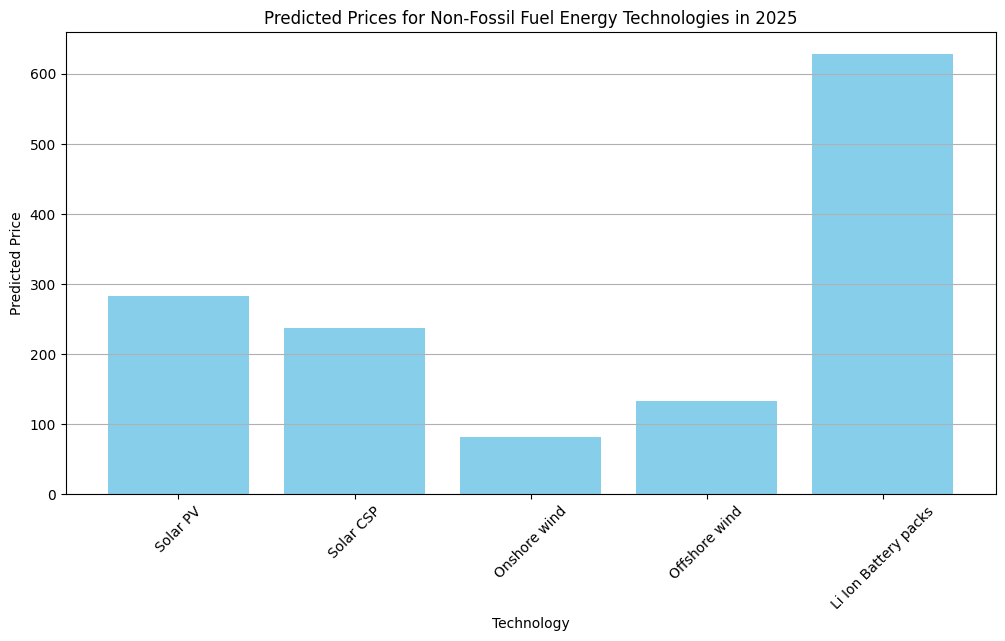

In [18]:
# install some packages to create linear regression models and impute missing values in the dataset
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

energy_prices = pd.read_csv('https://raw.githubusercontent.com/jelleiscool123/jelle_winc_final/main/WincAcademy/finalexercise/rawdata_finalexercise/01_SPM3_costs_adoption.csv')

# impute missing values using median and make a copy
imputer = SimpleImputer(strategy='median')
energy_prices_imputed = energy_prices.fillna(energy_prices.median()).copy()

# select features and target
x = energy_prices_imputed[['Year']].copy()
y = energy_prices_imputed.drop(['Year'], axis=1).copy()

# fit linear regression models for each technology
models = {}
for column in y.columns:
    lr = LinearRegression(fit_intercept=False)
    lr.fit(x, y[column])  
    models[column] = lr

# predict prices for the year 2025
predicted_prices = {}
for tech, model in models.items():
    predicted_prices[tech] = model.predict([[2025]])

# separate keys (sources) and values (predicted prices)
sources = list(predicted_prices.keys())
prices = [predicted_prices[tech][0] for tech in sources]

# plot the bar graph
mpl.figure(figsize=(12, 6))
mpl.bar(sources, prices, color='skyblue')
mpl.title('Predicted Prices for Non-Fossil Fuel Energy Technologies in 2025')
mpl.xlabel('Technology')
mpl.ylabel('Predicted Price')
mpl.xticks(rotation=45)
mpl.grid(axis='y')
mpl.show()

# the model predict that in 2025 onshore wind has the lowest price and is thus the best on-fossil fuel energy source in the future!!